## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [34]:
'''
asin-> Product ID from Amazon (str)
title-> Title of the product (str)
# stars-> Product rating. If 0, no ratings were found (float)
# reviews-> Number of customer reviews. If 0, no reviews were found. (int)
# price-> Price of the product. (float)
#isBestSeller-> Whether the product had the Amazon BestSeller status or not (bool)
# boughtInLastMount-> Indicates how many products we sold last month. (int)
category->Product category. (str)
'''

amz=pd.read_csv('amz_uk_price_prediction_dataset.csv',index_col='uid')

## Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
#Frequency Tables
category=amz['category'].value_counts()
top5_category=amz['category'].value_counts().head()
top5_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: xlabel='category'>

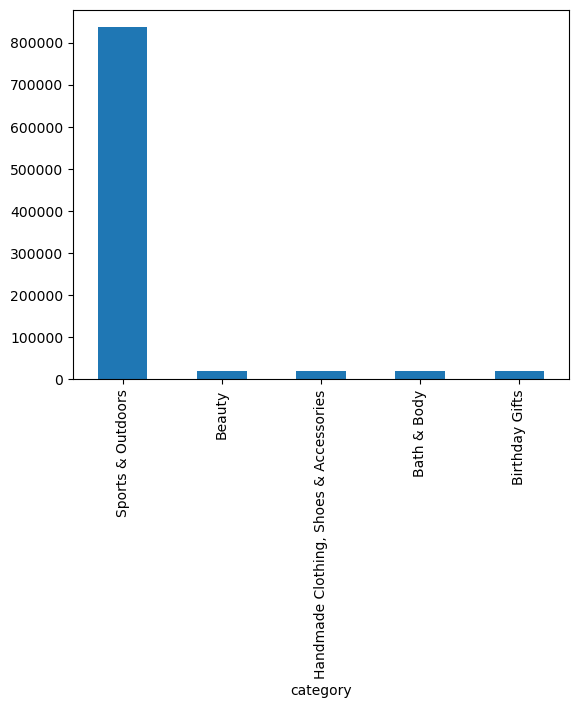

In [4]:
#Visualization
top5_category.plot.bar()

<Axes: ylabel='count'>

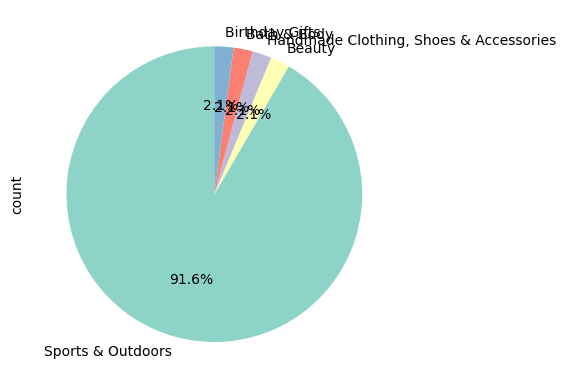

In [5]:
top5_category.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

## Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [6]:
# 1- Measures of Centrality
print(f"mode   {amz['price'].mode()}")
amz['price'].describe().round(2)

mode   0    9.99
Name: price, dtype: float64


count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [40]:
# 2 - Measures of Dispersion:
print(f"var   {amz['price'].var()}")
print(f"std   {amz['price'].std()}")
print(f"range   {(amz['price'].max()-amz['price'].min())}")
print(f"q25   {amz['price'].quantile([0.25, 0.5, 0.75,.85])}")


var   119445.48532256528
std   345.60886175352226
range   100000.0
q25   0.25     9.99
0.50    19.09
0.75    45.99
0.85    87.49
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Count'>

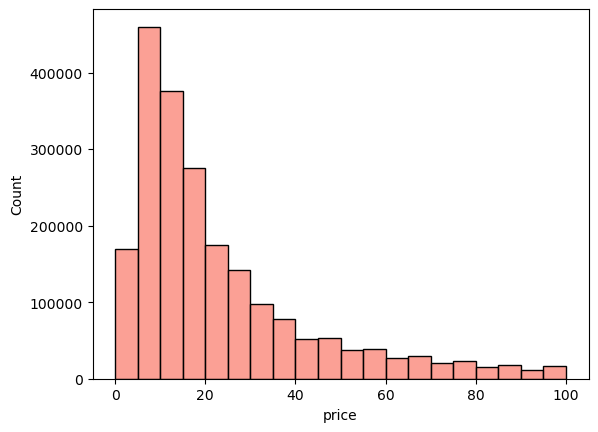

In [30]:
# 3- Visualization
amz_p100=amz[amz['price']<=100]
sns.histplot(amz_p100['price'], kde=False, bins=20, color="salmon")

## Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [46]:
amz_rating=amz[amz['stars']!=0]
# 1- Measures of Centrality
print(f"mode   {amz_rating['stars'].mode()}")
amz_rating['stars'].describe().round(2)

mode   0    4.5
Name: stars, dtype: float64


count    1218010.00
mean           4.32
std            0.56
min            1.00
25%            4.10
50%            4.40
75%            4.60
max            5.00
Name: stars, dtype: float64

In [48]:
# 2 - Measures of Dispersion:
print(f"var   {amz_rating['stars'].var()}")
print(f"std   {amz_rating['stars'].std()}")
print(f"range   {(amz_rating['stars'].max()-amz['stars'].min())}")
print(f"q25   {amz_rating['stars'].quantile([0.25, 0.5, 0.75,.85])}")

var   0.3083433752380519
std   0.5552867504614637
range   5.0
q25   0.25    4.1
0.50    4.4
0.75    4.6
0.85    4.7
Name: stars, dtype: float64


In [ ]:
# 3- Shape of the distributions

<Axes: xlabel='stars', ylabel='Count'>

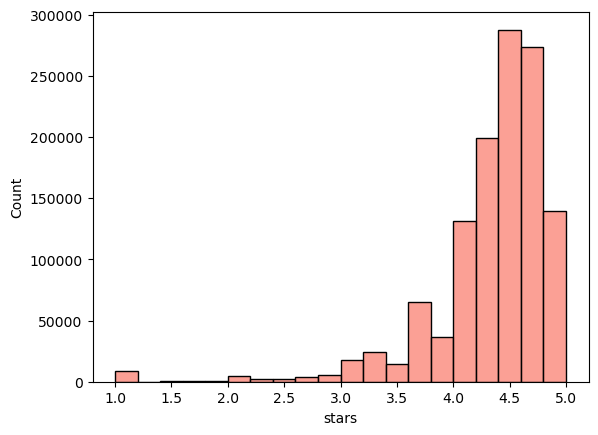

In [49]:
# 4- Visualization
sns.histplot(amz_rating['stars'], kde=False, bins=20, color="salmon")